In [130]:
import numpy as np #import numpy
import matplotlib.pyplot as plt #for plotting things

1)Investigate the value of the integral of the function f(x)=sin(pi/2 * x^2/2) between 0 and 7.0. To  fully  investigate  this  integral,  use  all  three  methods  discussed  in class (the rectangular method, the trapezoidal method, and Simpson's method) to do the integration. You should write functions which take the number of bins to do each of the integrations, and then evaluate the integral using 4 bins, 10 bins, 25 bins, and 100 bins for each of the methods.

In [131]:
def func(x): #define the function that is to be integrated
    return np.sin((np.pi/2)*(x**2/2))

In [132]:
#rectangular method

def rect(x_min,x_max,num_bins): #define an integral function, input: minimum, maximum, number of bins
    bin_size=(x_max-x_min)/num_bins #calculate the bin size
    area=0 #create the area variable which will turn out to be the integral, starting value=0
    for num in range(num_bins): #using the formula to get the integral sum up all the single areas
        area+=func(x_min+num*bin_size)*bin_size #adds to the area variable
    return area #output: calculated integral

bins=np.array([4,10,25,100]) #create an array with the desired bin numbers
for i in bins: #loop through all the bin numbers
    print('The rectangular integral for',i,'bins is',rect(0,7,i),'.') #print answer

The rectangular integral for 4 bins is 1.4233773508904473 .
The rectangular integral for 10 bins is 0.6883383223219193 .
The rectangular integral for 25 bins is 0.6049112785012158 .
The rectangular integral for 100 bins is 0.6204565821206479 .


In [133]:
#trapezoidal method

def trap(x_min,x_max,num_bins): #define an integral function, input: minimum, maximum, number of bins
    bin_size=(x_max-x_min)/num_bins #calculate the bin size
    area=(func(x_min)+func(x_max))/2 #create the area variable which will turn out to be the integral
    for num in range(1,num_bins): #using the formula to get the integral sum up all the single areas
        area+=func(x_min+num*bin_size) #adds to the area variable
    return area*bin_size #output: calculated integral

bins=np.array([4,10,25,100]) #create an array with the desired bin numbers
for i in bins: #loop through all the bin numbers
    print('The trapezoidal integral for',i,'bins is',trap(0,7,i),'.') #print answer

The trapezoidal integral for 4 bins is 2.042095784428674 .
The trapezoidal integral for 10 bins is 0.9358256957372096 .
The trapezoidal integral for 25 bins is 0.7039062278673326 .
The trapezoidal integral for 100 bins is 0.6452053194621771 .


In [135]:
#Simpson´s method

def simp(x_min,x_max,num_bins): #define an integral function, input: minimum, maximum, number of bins
    bin_size=(x_max-x_min)/num_bins #calculate the bin size
    area=0 #create the area variable which will turn out to be the integral
    for num in range(1,num_bins,2): #using the formula to get the integral sum up all the single areas
        bin0=x_min+(num-1)*bin_size #calculate the first bin, is done seperately for a clearer structure, could be all done in one line
        bin1=x_min+(num)*bin_size #calculate the second bin
        bin2=x_min+(num+1)*bin_size #calculate the third point
        area+=func(bin0)+4*func(bin1)+func(bin2) #add to area using the three calculated points
    if (num_bins%2)!=0: #additional term for uneven bin number (for the very last bin)
        area+=3/2*(func(x_max)+func(x_max-bin_size)) #add the extra term
    return area*bin_size/3 #output: calculated integral

bins=np.array([4,10,25,100]) #create an array with the desired bin numbers
for i in bins: #loop through all the bin numbers
    print('Simpson´s integral for',i,'bins is',simp(0,7,i),'.') #print answer

Simpson´s integral for 4 bins is 2.5379207992315624 .
Simpson´s integral for 10 bins is 0.4515097874636505 .
Simpson´s integral for 25 bins is 0.933703171728946 .
Simpson´s integral for 100 bins is 0.6418564475682186 .


In [137]:
#answer
print('For 100 bins the trapezoidal method and Simpson´s method give a very similar result while the rectangular method differs a lot. The discussions in class concluded that Simpson´s method is the fastest of the three methods. It is remarkable that the rectangular and trapezoidal method constantly decrease towards the final value whereas Simpson´s method shows some oscillations following from the costruction of the calculations.')

For 100 bins the trapezoidal method and Simpson´s method give a very similar result while the rectangular method differs a lot. The discussions in class concluded that Simpson´s method is the fastest of the three methods. It is remarkable that the rectangular and trapezoidal method constantly decrease towards the final value whereas Simpson´s method shows some oscillations following from the costruction of the calculations.


2)Use the Runge-Kutta 4 (RK4) method to estimate the angle of the pendulum example done in class with respect to time (produce the theta vs time plot). To make this a "fair" comparison you should use the same parameters (l=1m,  g=9.8m/s^2, theta0=0.2radians, dtheta0/dt=0) and  steps  of  0.04s. What is the angle at 3s (note that if you want to do a comparison like t==3, you may have to use the decimal package or round it off)?  Does this get closer to the actual solution (as presented in class) than the Euler method?

For t=3s the angle is -0.19968 radians!
This gets extremely close to the mathematical soultion (approximation of theta(t)=theta0*cos(sqrt(g/l)*t)) of theta=-0.199889 radians and does way better than the Euler method!


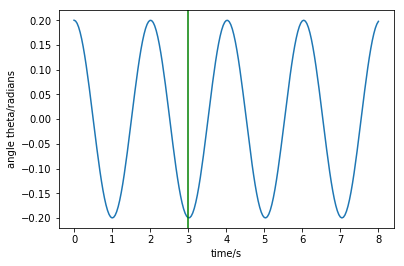

In [139]:
#constants
g=9.8 #g in m/s^2
l=1.0 #length l in m

def Deriv(yarr): #define derivative
    theta,omega=yarr #define theta and omega from the input to make it clearer
    return np.array([omega,-g/l*np.sin(theta)]) #returns the derivative

def RK4Iter(omega0,theta0,t0,h,N): #defines function for RK4 method, input: omega0,theta0,t0,step size for time, number of steps
    t=t0 #set variable to starting value
    tTrials=[t0] #save starting value
    thetaTrials=[theta0] #save starting value   
    omegaTrials=[omega0] #save starting value
    yn=np.array([theta0,omega0]) #create a vector (represented as an array) out of thata and omega
    for count in range(N): #loop over given number
        t=t+h #first increase the time by the given step
        tTrials.append(t) #save that
        k1=Deriv(yn) #now for calculating the different k´s
        k2=Deriv(yn+(h/2)*k1) #calculate k2 using k1
        k3=Deriv(yn+(h/2)*k2) #calculate k3 using k2
        k4=Deriv(yn+h*k3) #calculate k4 using k3
        yn+=h*(k1/6+k2/3+k3/3+k4/6) #calculate the new array
        theta,omega=yn #define what is theta and omega (just for making it clearer)
        thetaTrials.append(theta) #save the new value
        omegaTrials.append(omega) #save the new value
    return tTrials,thetaTrials,omegaTrials #returns the lists at the end of the calculation

t,theta,omega=RK4Iter(0,0.2,0,0.04,200) #does the calculation for the given values
plt.plot(t,theta) #plot
plt.xlabel('time/s') #x-axis label
plt.ylabel('angle theta/radians') #y-axis label
plt.axvline(x=3,c='g') #print a line at x=3 (just for checking)

ind=[round(x,6) for x in t].index(3) #find the index
print('For t=3s the angle is %1.5f'%theta[ind],'radians!') #answer

#asnwer
print('This gets extremely close to the mathematical soultion (approximation of theta(t)=theta0*cos(sqrt(g/l)*t)) of theta=-0.199889 radians and does way better than the Euler method!')

3)Change the pendulum example provided above to include a damping term and solve this using the Euler method. This means the differential equation is now:
d^2theta/dt^2=-g * sin(theta)/l - beta * dtheta/dt
Use the same parameters as the previous equation (same starting angle, length, gravity, etc) and set beta=1.0. Produce the angle vs time plot for the same time range presented in class (0 to 14s) and compare to see what the differences are between the undamped and damped solution.

While the undamped solution behaves extremely weird and non-physical by increasing the angle with each oscillaton, the damped case behaves clearly more reasonable by decreasing the amplitude with each oscillation!


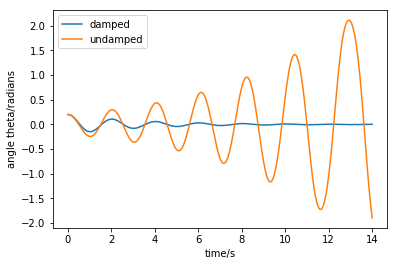

In [141]:
#constants
g=9.8 #g in m/s^2
l=1.0 #length l in m

def Deriv_damp(yarr,beta): #define derivative in dependence of beta
    theta,omega=yarr #define theta and omega from the input to make it clearer
    return np.array([omega,-g/l*np.sin(theta)-beta*omega]) #returns the derivative

def EulerIter(omega0,theta0,t0,beta,h,N): #defines function for RK4 method, input: omega0,theta0,t0,beta,step size for time, number of steps
    t=t0 #set variable to starting value
    tTrials=[t0] #save starting value
    thetaTrials=[theta0] #save starting value   
    omegaTrials=[omega0] #save starting value
    yn=np.array([theta0,omega0]) #create a vector (represented as an array) out of theta and omega
    for count in range(N): #loop over given number
        t=t+h #first increase the time by the given step
        tTrials.append(t) #save that
        yn+=h*Deriv_damp(yn,beta) #calculate the new vector
        theta,omega=yn #define what is theta and omega (just for making it clearer)
        thetaTrials.append(theta) #save the new value
        omegaTrials.append(omega) #save the new value
    return tTrials,thetaTrials,omegaTrials #returns the lists at the end of the calculation

t_damp,theta_damp,omega_damp=EulerIter(0,0.2,0,1,0.04,350) #does the calculation for damped case
t_undamp,theta_undamp,omega_undamp=EulerIter(0,0.2,0,0,0.04,350) #does the calculation for undamped case
plt.plot(t_damp,theta_damp,label='damped') #plot
plt.plot(t_undamp,theta_undamp,label='undamped') #plot
plt.xlabel('time/s') #x-axis label
plt.ylabel('angle theta/radians') #y-axis label
plt.legend()

#answer
print('While the undamped solution behaves extremely weird and non-physical by increasing the angle with each oscillaton, the damped case behaves clearly more reasonable by decreasing the amplitude with each oscillation!')